# Numerical solution of the Blasius boundary layer
&copy; Harishankar Manikantan, Chemical Engineering, UC Davis 

The Prandtl boundary layer equations transform into the Blasius solution under the similarity transform $\psi=\sqrt{\nu U x}f(\eta)$, where $\eta=y/\delta(x)$. Here, $\delta(x)=\sqrt{\nu x /U}$ is the boundary layer thickness with $U$ the outer (potential) freestream velocity. It can be shown that the velocity as a function of the position $\eta$ away from the surface is given by $u=f'=df/d\eta$, where the function $f$ satisfies

$$ 2 f''' + f f'' =0,  $$

where primes denote derivatives. The boundary conditions are that $f(0)=0$, $f'(0)=0$, and that $f'=1$ far from the surface. For simplicity, let's use $\eta=10$ as 'far away'. Solve this BVP using `solve_bvp` and plot the velocity profile in the range of $\eta$ in $[0,10]$.

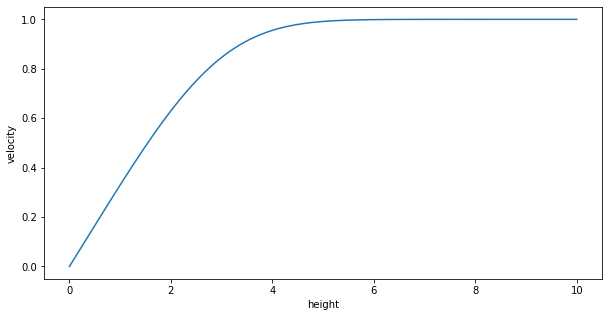

In [48]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt

# define right hand side of first-order ODE system
def F(x,Y): return [Y[1],Y[2],-Y[0]*Y[2]/2]

# define residuals of boundary conditions
def bc(Ya, Yb): return [Ya[0], Ya[1],Yb[1]-1]

# range of independent variable
x = np.arange(0, 10+0.01, 0.01)

# initialize dependedent array
yinit = np.zeros((3, x.size))

# solve and write to an object (pick any name, here 'sol')
sol = si.solve_bvp(F, bc, x, yinit)

# obtain first dependent variable
# horizontal velocity in this case, proportional to second element in array
y = sol.sol(x)[1]

# plot
plt.figure(figsize=(10,5))
plt.plot(x, y)
# plot boundary conditions to compare
plt.xlabel("height")
plt.ylabel("velocity")
plt.show()

When the plate is sloped at an angle of $\alpha=\beta \pi$ relative to the direction of the outer uniform velocity field, the Blasius equation gets modified to the Falkner-Skan equation:

$$  f''' + f f'' + \beta \left[1- f'^2 \right]=0,  $$

with the same boundary conditions. The following function solves the Falkner-Skan equation, and then plots it for any $\beta$:

In [62]:
def FS(beta):
    # define right hand side of first-order ODE system
    def F(x,Y): return [Y[1],Y[2],-Y[0]*Y[2]/2-beta*(1-Y[1]**2)]

    # define residuals of boundary conditions
    def bc(Ya, Yb): return [Ya[0], Ya[1],Yb[1]-1]

    # range of independent variable
    x = np.arange(0, 5+0.01, 0.01)

    # initialize dependedent array
    yinit = np.zeros((3, x.size))

    # solve and write to an object (pick any name, here 'sol')
    sol = si.solve_bvp(F, bc, x, yinit)

    # obtain first dependent variable
    # horizontal velocity in this case, proportional to second element in array
    return sol.sol(x)[1]

    


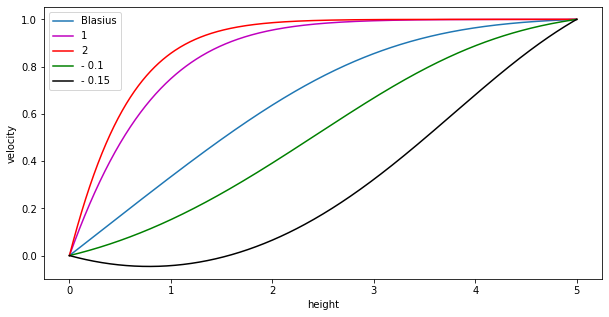

In [64]:
# plot
plt.figure(figsize=(10,5))
x = np.arange(0, 5+0.01, 0.01)
plt.plot(x, FS(0),label='Blasius')
plt.plot(x, FS(1),'m',label='1')
plt.plot(x, FS(2),'r',label='2')
plt.plot(x, FS(-0.1),'g',label='- 0.1')
plt.plot(x, FS(-0.15),'k',label='- 0.15')
# plot boundary conditions to compare
plt.xlabel("height")
plt.ylabel("velocity")
plt.legend()
plt.show()